In [1]:
%matplotlib inline 
import pandas as pd 

In [2]:
import os
os.chdir('C://Users//2918261//Dropbox//Corner Office Interviews')
os.getcwd()
## C://Users//Toshiba//Dropbox//Corner Office Interviews
## C://Users//2918261//Dropbox//Corner Office Interviews
## C://Users//2918261//Courses//Oslo Summer School//notebooks//Interviews//Text 

'C:\\Users\\2918261\\Dropbox\\Corner Office Interviews'

In [3]:
pd.set_option('display.max_colwidth', 120)

In [4]:
interviews = pd.read_json('C:/Users/2918261/Dropbox/Corner Office Interviews/ComparisonCorpusText/Json Tables for ML/interviews_full.json')

In [ ]:
## interviews = pd.read_json('C:/Users/Toshiba/Dropbox/Corner Office Interviews/ComparisonCorpusText/Json Tables for ML/interviews_full.json')

## sort table alphabetically

In [5]:
interviews = interviews.sort_values('filename').copy()

In [6]:
interviews

,filename,text,Name,Gender,Organization,Current Age,NativeSpeaker,Traded,MBA,Sector_Grouped,Female,Sector_Grouped_Dic,Femininity,Masculinity
0,AaronBellCombined.txt,Very well. Thanks for having me.\nYeah. So a little bit about adroll. First of all we were founded in 2007 uh with a...,AaronBell,M,AdRoll,42,1,0,0,2,0,Communications,64.47,38.83
1,AaronLevieCombined.txt,Oh boy.Wow. Did we kick off this show\nThank you. I am glad that you re-professed your love for B2B. \nYeah its bee...,AaronLevie,M,Box Inc,33,1,1,0,3,0,Technology,63.35,37.73
2,AbbeRavenCombined.txt,A good question. Let me tackle the how does it happen first. I always felt early in my career that the key to being ...,AbbeRaven,F,A&E Television Networks LLC,66,1,0,0,2,1,Communications,62.63,38.94
3,AbeAnkumahCombined.txt,Being far away from home actually did not end up being as hard as people normally would have thought because I went...,AbeAnkumah,M,Nyansa,41,0,0,1,3,0,Technology,65.51,38.98
4,AdamNashCombined.txt,In 2012 I was seriously considering becoming a full time investor.\nI have always loved startups and venture capital...,AdamNash,M,Wealthfront,44,1,0,1,4,0,Other,62.76,40.87
5,AdiTatarkoCombined.txt,No entrepreneurship was not on my mind. Even though I am third in a line of female entrepreneurs I never thought I w...,AdiTatarko,F,Houzz Inc,47,0,0,0,1,1,Consumer Discretionary,62.10,42.03
6,AileenLeeCombined.txt,Many entrepreneurs and the venture investors who back them seek to build billion-dollar companies.\n Why do investo...,AileenLee,F,Cowboy Ventures,49,1,0,1,4,1,Other,59.92,38.68
7,AlanDabbiereCombined.txt,thank you I think somebody printed my wiki my wiki page my LinkedIn profile my Twitter account my I do not know wher...,AlanDabbiere,M,AirWatch LLC,57,1,0,1,3,0,Technology,63.52,36.30
8,AlanRMulallyCombined.txt,Glad to be here.\n Transformation would be my first word. And what I mean by that is that this is an American icon ...,AlanRMulally,M,Ford Motor Co Ltd,73,1,1,0,1,0,Consumer Discretionary,56.81,41.01
9,AlanTreflerCombined.txt,Prior to starting Pegasystems I worked for large New York banks as a systems integrator. Computers were getting fas...,AlanTrefler,M,Pegasystems Inc,63,1,1,0,3,0,Technology,58.71,48.18


## import packages 

In [7]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Pool size changed, may indicate binary incompatibility. Expected 48 from C header, got 64 from PyObject
  return f(*args, **kwds)
C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: cymem.cymem.Address size changed, may indicate binary incompatibility. Expected 24 from C header, got 40 from PyObject
  return f(*args, **kwds)


In [8]:
data = interviews.text.values.tolist()

In [9]:
data = [re.sub("\'", "", sent) for sent in data]

In [10]:
pprint(data[:1])

['Very well. Thanks for having me.\n'
 'Yeah. So a little bit about adroll. First of all we were founded in 2007 uh '
 'with a mission to bring advertising to brands of all sizes back when we '
 'started. Uh the advertising world was very different. Um the advertisements '
 'you saw online work so different than the ones you saw offline you know a '
 'typical campaign would be nike running a sponsorship on the front page and '
 'there was not much space for all the emerging brands out there. Uh and so we '
 'set out to change that. And fast forward to today were now the most widely '
 'adopted um marketing tech platform out there for brands of all sizes. And we '
 'have two business units one focused on consumer called adroll and then a '
 'sister brand called inaudible which is focused on B to b advertisers. Uh we '
 'started the company in 2007. Um my background before adderall was almost all '
 'engineering.\n'
 'Um so I come from a very uh I love to build things. And when I began a

 'dollar on trading and investing in somebody and uh rather than on some sort '
 'of perk um that is kind of more temporary. Uh so we we we tried to put our '
 'money there and at ad roll we teach thousands of classes per year. We have '
 'employees teach classes maybe on like how to use tablo or you know how to '
 'use something in our dough how to understand. Saying in our domain we bring '
 'in a lot of external teachers too. I am on almost like virtual mba type '
 'stuff. Uh we also have you know the whole the whole whole body type of stuff '
 'where we have a we have had teachers come in and teach zoomba classes or '
 'other sorts of health related. I am pretty frequently so there is over 3000 '
 'classes taught a year here for a 500 person company.\n'
 'Yeah. I think that there is three pillars around culture there is community '
 'which is how do people interact how do they get along how inclusive is your '
 'environment how comfortable people asking questions uh you know the pe

 'looking back on things and making sure that you are actually taking the time '
 'to learn from your failures. And I think by people understanding the value '
 'in that process then they are more likely to understand its okay to make '
 'mistakes.\n'
 'Um that is a good question actually. Uh one thing that you would have asked '
 'me about culture would be um well one thing I think its kind of there are '
 'two things I can relate to that I am. The first one is how do you measure '
 'culture which I think is really important. Um its sorta like how can it goes '
 'back to this idea I have where there is this. I think a myth out there were '
 'as a company gets bigger the culture gets worse it gets more bureaucratic '
 'against more stuffy things get slower there are diseconomies of scale. And I '
 'am hell-bent on destroying that myth. So actually as a company gets bigger '
 'how do you make sure that the company improves and I think I think '
 'measurements will be part of that. So we

## tokenizing and clean up with gensim simple_preprocess()

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

interviews['data_words'] = list(sent_to_words(data)).copy()

In [12]:
print(interviews['data_words'][:1])

0    [very, well, thanks, for, having, me, yeah, so, little, bit, about, adroll, first, of, all, we, were, founded, in, u...
Name: data_words, dtype: object


In [13]:
list(interviews.columns)

['filename',
 'text',
 'Name ',
 'Gender',
 'Organization',
 'Current Age',
 'NativeSpeaker',
 'Traded',
 'MBA',
 'Sector_Grouped',
 'Female',
 'Sector_Grouped_Dic',
 'Femininity',
 'Masculinity',
 'data_words']

## stemming

In [14]:
from nltk.stem import PorterStemmer

In [15]:
stemmer = PorterStemmer()

In [16]:
def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

In [17]:
interviews['data_words_stemmed'] = interviews['data_words'].apply(lambda x: word_stemmer(x)).copy()

## lemmatizing 

In [18]:
from nltk.stem import WordNetLemmatizer

In [19]:
wnl = WordNetLemmatizer()

In [20]:
interviews['data_words_stemmed_lemmatized']=interviews['data_words_stemmed'].apply(wnl.lemmatize).copy()

## selecting tokens with count vectorizer

In [21]:
vectorizer = CountVectorizer(analyzer='word',
                             ngram_range = (1, 3),
                             min_df = 0.2,
                             max_df = 0.9, # minimum reqd occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # '[a-zA-Z0-9]{3,}' num chars > 3
                             # max_features=50000,             # max number of uniq words
                            )

In [22]:
data_vectorized = vectorizer.fit_transform(interviews['data_words_stemmed_lemmatized'])

In [23]:
len(vectorizer.get_feature_names())

747

In [24]:
counts = pd.DataFrame(data_vectorized.todense(),
         columns = vectorizer.get_feature_names())

In [25]:
len(counts.columns)

747

In [26]:
tree = pd.concat([interviews, counts], axis = 1)

In [27]:
list(tree.columns)

['filename',
 'text',
 'Name ',
 'Gender',
 'Organization',
 'Current Age',
 'NativeSpeaker',
 'Traded',
 'MBA',
 'Sector_Grouped',
 'Female',
 'Sector_Grouped_Dic',
 'Femininity',
 'Masculinity',
 'data_words',
 'data_words_stemmed',
 'data_words_stemmed_lemmatized',
 'abil',
 'abl',
 'absolut',
 'accept',
 'access',
 'accomplish',
 'account',
 'achiev',
 'act',
 'action',
 'activ',
 'actual',
 'add',
 'addit',
 'advantag',
 'advic',
 'afraid',
 'age',
 'ago',
 'agre',
 'ahead',
 'allow',
 'alreadi',
 'amaz',
 'america',
 'american',
 'ani',
 'anoth',
 'answer',
 'anybodi',
 'anymor',
 'anyon',
 'anyth',
 'appli',
 'appreci',
 'approach',
 'area',
 'ask peopl',
 'ask question',
 'aspect',
 'assum',
 'attent',
 'avail',
 'awar',
 'away',
 'background',
 'bad',
 'balanc',
 'base',
 'basic',
 'becam',
 'becaus know',
 'becaus peopl',
 'becaus think',
 'becaus want',
 'becom',
 'befor',
 'begin',
 'behavior',
 'believ',
 'benefit',
 'best',
 'better',
 'big',
 'bigger',
 'biggest',
 'bill

## Random Forest

In [45]:
list(tree.columns)

['filename',
 'text',
 'Name ',
 'Gender',
 'Organization',
 'Current Age',
 'NativeSpeaker',
 'Traded',
 'MBA',
 'Sector_Grouped',
 'Female',
 'Sector_Grouped_Dic',
 'Femininity',
 'Masculinity',
 'data_words',
 'data_words_stemmed',
 'data_words_stemmed_lemmatized',
 'abil',
 'abl',
 'absolut',
 'accept',
 'access',
 'accomplish',
 'account',
 'achiev',
 'act',
 'action',
 'activ',
 'actual',
 'add',
 'addit',
 'advantag',
 'advic',
 'afraid',
 'age',
 'ago',
 'agre',
 'ahead',
 'allow',
 'alreadi',
 'amaz',
 'america',
 'american',
 'ani',
 'anoth',
 'answer',
 'anybodi',
 'anymor',
 'anyon',
 'anyth',
 'appli',
 'appreci',
 'approach',
 'area',
 'ask peopl',
 'ask question',
 'aspect',
 'assum',
 'attent',
 'avail',
 'awar',
 'away',
 'background',
 'bad',
 'balanc',
 'base',
 'basic',
 'becam',
 'becaus know',
 'becaus peopl',
 'becaus think',
 'becaus want',
 'becom',
 'befor',
 'begin',
 'behavior',
 'believ',
 'benefit',
 'best',
 'better',
 'big',
 'bigger',
 'biggest',
 'bill

In [46]:
y = tree['Female']

In [47]:
X = tree.drop(['filename',
 'text',
 'Name ',
 'Gender',
 'Organization',
 'Current Age',
 'NativeSpeaker',
 'Traded',
 'MBA',
 'Sector_Grouped',
 'Female',
 'Sector_Grouped_Dic',
 'Femininity',
 'Masculinity',
 'data_words',
 'data_words_stemmed',
 'data_words_stemmed_lemmatized'], axis = 1)

In [48]:
X.shape

(522, 747)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [50]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2)

In [51]:
forest = RandomForestClassifier().fit(X_Train,y_Train)

C:\Users\2918261\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
forest_predictions = forest.predict(X_Test)

In [53]:
from sklearn.model_selection import cross_val_score

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [54]:
rfc_cv_score = cross_val_score(forest, X, y, cv=10, scoring= "roc_auc")

In [58]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_Test, forest_predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_Test, forest_predictions))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[55  8]
 [23 19]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.87      0.78        63
           1       0.70      0.45      0.55        42

   micro avg       0.70      0.70      0.70       105
   macro avg       0.70      0.66      0.67       105
weighted avg       0.70      0.70      0.69       105



=== All AUC Scores ===
[0.77083333 0.68080357 0.75446429 0.83779762 0.67734375 0.7796875
 0.69140625 0.70859375 0.61048387 0.67903226]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.7190446188556067


In [60]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_Train, y_Train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.5min finished


{'n_estimators': 1200, 'max_features': 'auto', 'max_depth': 460}


In [61]:
rfc = RandomForestClassifier(n_estimators=1200, max_depth=460, max_features='auto')
rfc.fit(X_Train,y_Train)
rfc_predict = rfc.predict(X_Test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_Test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_Test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[61  2]
 [23 19]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        63
           1       0.90      0.45      0.60        42

   micro avg       0.76      0.76      0.76       105
   macro avg       0.82      0.71      0.72       105
weighted avg       0.80      0.76      0.74       105



=== All AUC Scores ===
[0.9203869  0.8608631  0.93005952 0.90550595 0.87109375 0.840625
 0.86171875 0.79375    0.825      0.83467742]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8643680395545316


In [62]:
importances_rf = pd.Series(rfc.feature_importances_, 
                          index = X_Train.columns)

In [71]:
sorted_importances_rf = importances_rf.sort_values(ascending = False)[:30]

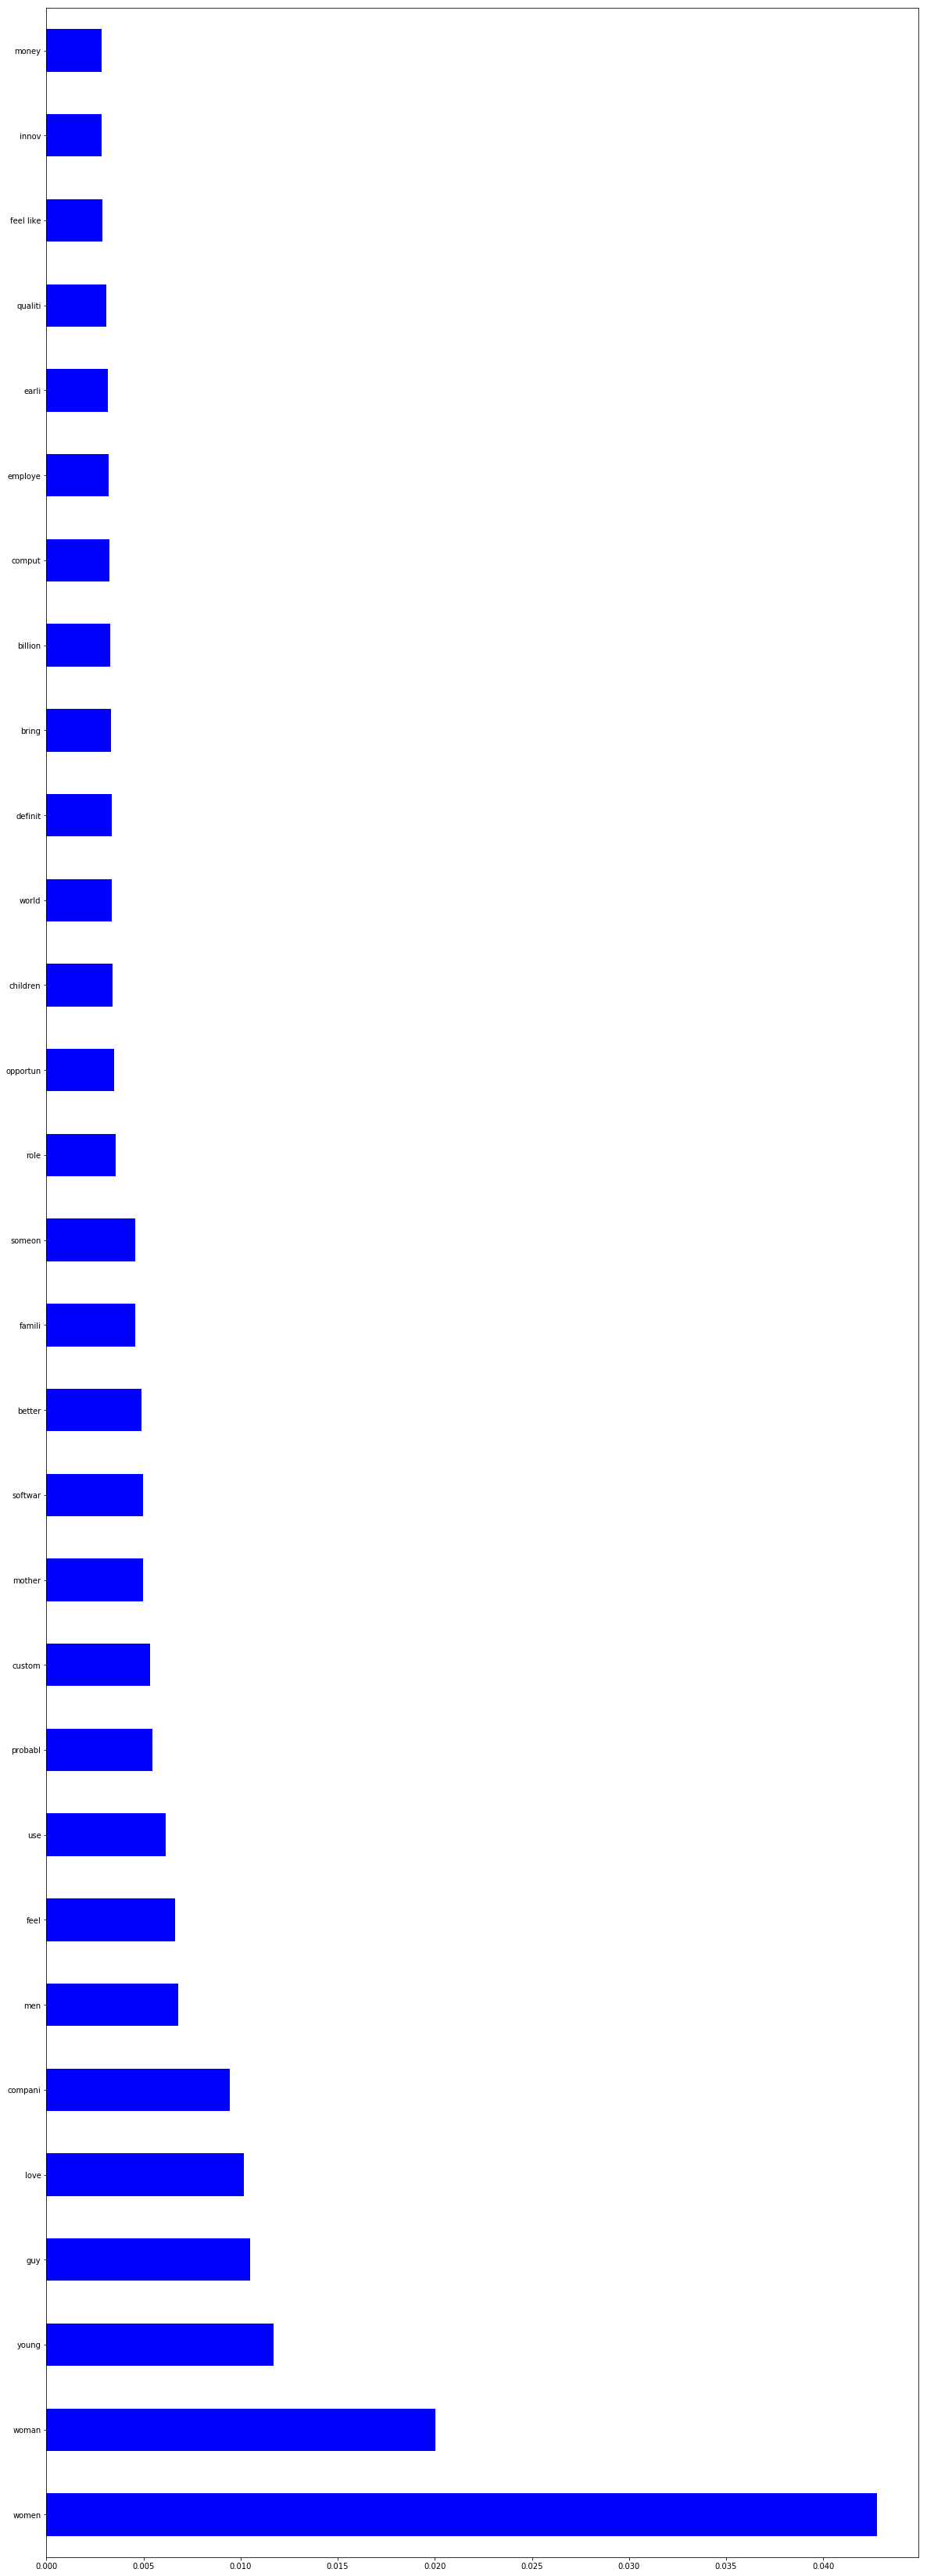

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 60))
sorted_importances_rf.plot(kind = 'barh', color = 'blue') 
# plt.title('Feature Importances LIWC & TFIDF')
plt.savefig('Feature Importances.png')
plt.show()

In [69]:
importances_rf.sort_values(ascending = True)[:30]

rest            0.000342
veri veri       0.000344
becaus think    0.000346
depend          0.000358
want make       0.000363
exist           0.000363
onlin           0.000369
particularli    0.000370
just like       0.000375
veri good       0.000406
mani peopl      0.000407
demand          0.000410
thing happen    0.000413
earlier         0.000416
becaus know     0.000418
add             0.000422
relat           0.000423
work togeth     0.000428
wrote           0.000429
journey         0.000430
late            0.000432
ourselv         0.000451
essenti         0.000455
uniqu           0.000460
assum           0.000460
aspect          0.000461
price           0.000463
collect         0.000465
effici          0.000467
tell peopl      0.000467
dtype: float64

In [70]:
importances_rf.sort_values(ascending = False)[:30]

women        0.042783
woman        0.020016
young        0.011676
guy          0.010475
love         0.010152
compani      0.009441
men          0.006786
feel         0.006604
use          0.006136
probabl      0.005472
custom       0.005322
mother       0.004987
softwar      0.004974
better       0.004900
famili       0.004581
someon       0.004556
role         0.003574
opportun     0.003468
children     0.003410
world        0.003367
definit      0.003355
bring        0.003310
billion      0.003291
comput       0.003238
employe      0.003183
earli        0.003147
qualiti      0.003099
feel like    0.002868
innov        0.002825
money        0.002822
dtype: float64